<a href="https://colab.research.google.com/github/kerenalli/DATA_MINING/blob/main/Pyclustering_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyclustering

     |████████████████████████████████| 2.6MB 5.8MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-cp37-none-any.whl size=2395105 sha256=1f3c493d931767ac3798d03abe07a7e077588f27dc4523f02a00edd1931cb43a
  Stored in directory: /root/.cache/pip/wheels/d4/98/57/2f53b94ccf47805e95e189e8a18f58a51ff61d67955b79c60d
Successfully built pyclustering


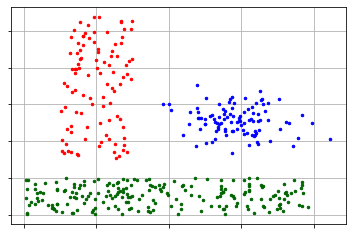

In [ ]:
 from pyclustering.cluster import cluster_visualizer;
from pyclustering.cluster.cure import cure;
from pyclustering.utils import read_sample;
from pyclustering.samples.definitions import FCPS_SAMPLES;
 
# Input data in following format [ [0.1, 0.5], [0.3, 0.1], ... ].
input_data = read_sample(FCPS_SAMPLES.SAMPLE_LSUN);
 
# Allocate three clusters.
cure_instance = cure(input_data, 3);
cure_instance.process();
clusters = cure_instance.get_clusters();
 
# Visualize allocated clusters.
visualizer = cluster_visualizer();
visualizer.append_clusters(clusters, input_data);
visualizer.show();

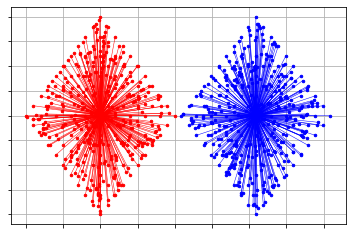

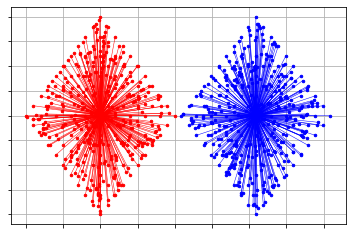

In [ ]:
from pyclustering.cluster.kmeans import kmeans, kmeans_visualizer
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.samples.definitions import FCPS_SAMPLES
from pyclustering.utils import read_sample
 
# Load list of points for cluster analysis.
sample = read_sample(FCPS_SAMPLES.SAMPLE_TWO_DIAMONDS)
 
# Prepare initial centers using K-Means++ method.
initial_centers = kmeans_plusplus_initializer(sample, 2).initialize()
 
# Create instance of K-Means algorithm with prepared centers.
kmeans_instance = kmeans(sample, initial_centers)
 
# Run cluster analysis and obtain results.
kmeans_instance.process()
clusters = kmeans_instance.get_clusters()
final_centers = kmeans_instance.get_centers()
 
# Visualize obtained results
kmeans_visualizer.show_clusters(sample, clusters, final_centers)

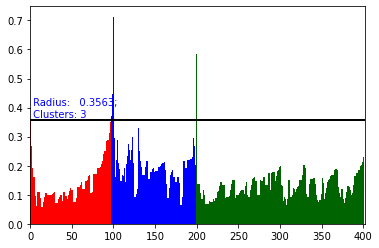

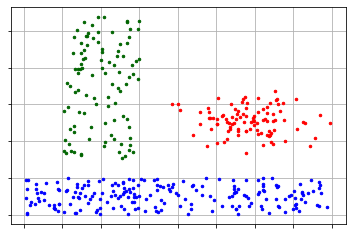

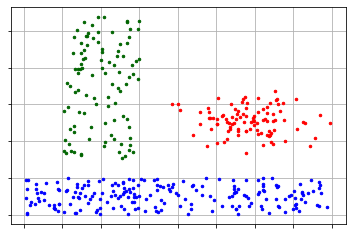

In [ ]:
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.optics import optics, ordering_analyser, ordering_visualizer
from pyclustering.samples.definitions import FCPS_SAMPLES
from pyclustering.utils import read_sample
 
# Read sample for clustering from some file
sample = read_sample(FCPS_SAMPLES.SAMPLE_LSUN)
 
# Run cluster analysis where connectivity radius is bigger than real
radius = 2.0
neighbors = 3
amount_of_clusters = 3
optics_instance = optics(sample, radius, neighbors, amount_of_clusters)
 
# Performs cluster analysis
optics_instance.process()
 
# Obtain results of clustering
clusters = optics_instance.get_clusters()
noise = optics_instance.get_noise()
ordering = optics_instance.get_ordering()
 
# Visualize ordering diagram
analyser = ordering_analyser(ordering)
ordering_visualizer.show_ordering_diagram(analyser, amount_of_clusters)
 
# Visualize clustering results
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, sample)
visualizer.show()

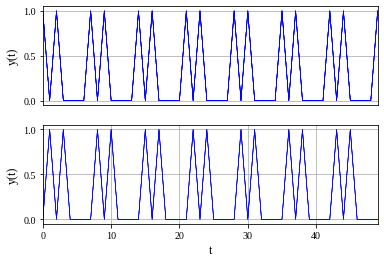

In [ ]:
from pyclustering.nnet.pcnn import pcnn_network, pcnn_visualizer
 
# Create Pulse-Coupled neural network with 10 oscillators.
net = pcnn_network(10)
 
# Perform simulation during 100 steps using binary external stimulus.
dynamic = net.simulate(50, [1, 1, 1, 0, 0, 0, 0, 1, 1, 1])
 
# Allocate synchronous ensembles from the output dynamic.
ensembles = dynamic.allocate_sync_ensembles()
 
# Show output dynamic.
pcnn_visualizer.show_output_dynamic(dynamic, ensembles)

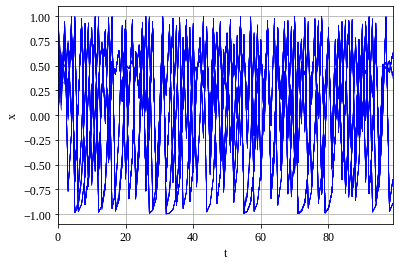

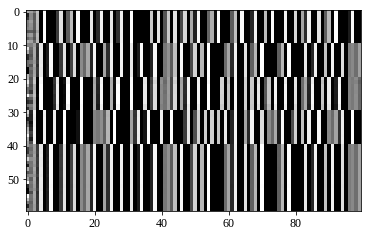

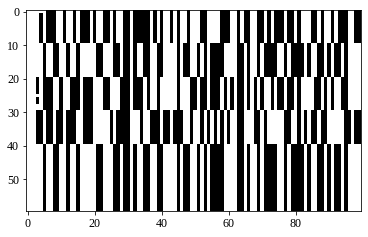

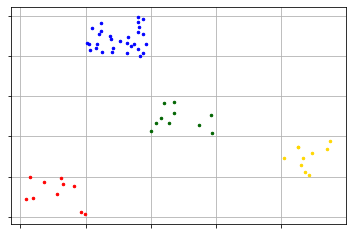

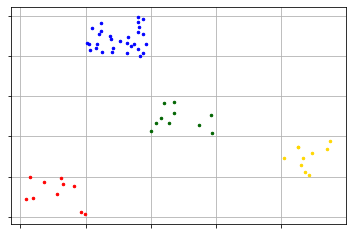

In [ ]:
from pyclustering.cluster import cluster_visualizer
from pyclustering.samples.definitions import SIMPLE_SAMPLES
from pyclustering.utils import read_sample
from pyclustering.nnet.cnn import cnn_network, cnn_visualizer
 
# Load stimulus from file.
stimulus = read_sample(SIMPLE_SAMPLES.SAMPLE_SIMPLE3)
 
# Create chaotic neural network, amount of neurons should be equal to amount of stimulus.
network_instance = cnn_network(len(stimulus))
 
# Perform simulation during 100 steps.
steps = 100
output_dynamic = network_instance.simulate(steps, stimulus)
 
# Display output dynamic of the network.
cnn_visualizer.show_output_dynamic(output_dynamic)
 
# Display dynamic matrix and observation matrix to show clustering phenomenon.
cnn_visualizer.show_dynamic_matrix(output_dynamic)
cnn_visualizer.show_observation_matrix(output_dynamic)
 
# Visualize clustering results.
clusters = output_dynamic.allocate_sync_ensembles(10)
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, stimulus)
visualizer.show()